In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

## 기간 설정
* 선거 이전: "2011-08-22", "2012-04-22"
* 선거 기간~당선 ("2012-04-23" ~ "2012-12-19")
* 당선이후 재임시절까지 ("2012-12-20" ~ "2017-03-10")

In [13]:
stock_moon = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '조광페인트': '004910',
    '유성티엔에스': '024800',
    '신일산업': '002700'}
stock_moon

{'우리들휴브레인': '118000',
 '바른손': '018700',
 '조광페인트': '004910',
 '유성티엔에스': '024800',
 '신일산업': '002700'}

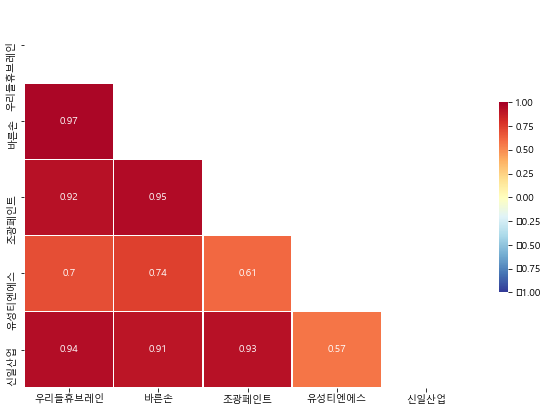

In [15]:
#   선거 이전: "2011-08-22", "2012-04-22"
item_list = []
for item_code in stock_moon.values():
    change = fdr.DataReader(item_code, "2011-08-22", "2012-04-22")['Close']
    item_list.append(change)

moon_1112 = pd.concat(item_list, axis=1)
moon_1112.columns = stock_moon.keys()
moon_1112.reset_index(inplace=True)

moon_1112 ['Date'] = pd.to_datetime(moon_1112 ['Date'])
moon_1112 .set_index('Date', inplace=True)


moon_1112.corr = moon_1112.corr() 

fig, ax = plt.subplots(figsize=(10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1112.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1112.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

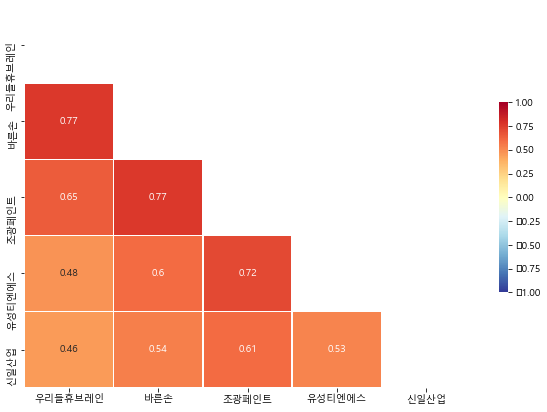

In [10]:
# 선거 기간~당선 ("2012-04-23" ~ "2012-12-19")

item_list = []
for item_code in stock_moon.values():
    change = fdr.DataReader(item_code, "2012-04-23" , "2012-12-19")['Close']
    item_list.append(change)

moon_elect = pd.concat(item_list, axis=1)
moon_elect.columns =stock_moon.keys()
moon_elect.reset_index(inplace=True)

moon_elect ['Date'] = pd.to_datetime(moon_elect['Date'])
moon_elect.set_index('Date', inplace=True)

moon_elect.corr = moon_elect.corr() 

fig, ax = plt.subplots(figsize=(10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_elect.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_elect.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

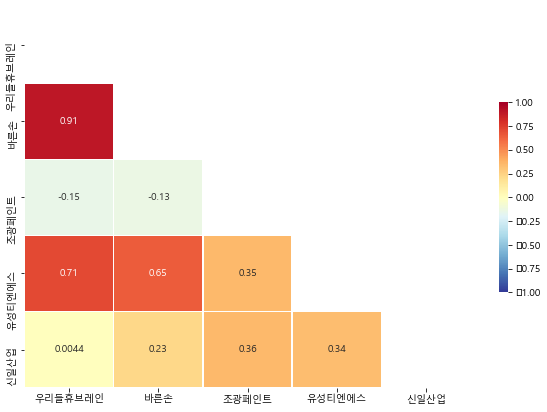

In [16]:
# 당선이후 재임시절까지 ("2012-12-20" ~ "2017-03-10")
item_list = []
for item_code in stock_moon.values():
    change = fdr.DataReader(item_code, "2012-12-20" , "2017-03-10")['Close']
    item_list.append(change)

moon_1217 = pd.concat(item_list, axis=1)
moon_1217.columns = stock_moon.keys()
moon_1217.reset_index(inplace=True)

moon_1217['Date'] = pd.to_datetime(moon_1217['Date'])
moon_1217.set_index('Date', inplace=True)


moon_1217.corr = moon_1217.corr() 

fig, ax = plt.subplots(figsize=(10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1217.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1217.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()